<a href="https://colab.research.google.com/github/SpyHecker/Machine-Learning-SPPU/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on Improving Performance of Classifier Models
A SMS unsolicited mail (every now and then known as cell smartphone junk mail) is any junk
message brought to a cellular phone as textual content messaging via the Short Message Service
(SMS). Use probabilistic approach (Naive Bayes Classifier / Bayesian Network)to implement SMS
Spam Filtering system. SMS messages are categorized as SPAM or HAM using features like length of
message, word depend, unique keywords etc.

Download Data -Set from : http://archive.ics.uci.edu/ml/datasets/sms+spam+collection

This dataset is composed by just one text file, where each line has the correct class followed by
the raw message.

A. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
necessary

B. Perform data-preparation (Train-Test Split)

C. Apply at least two Machine Learning Algorithms and Evaluate Models

D. Apply Cross-Validation and Evaluate Models and compare performance.

E. Apply Hyper parameter tuning and evaluate models and compare performance

In [9]:
import pandas as pd
df = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
swords = stopwords.words('english')
from nltk.stem import PorterStemmer as ps
ps = ps()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [23]:
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word for word in tokens if word.isdigit() or word.isalpha()]
  clean = [ps.stem(word) for word in clean if word not in swords]
  return clean

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
x = df['text']
y = df['label']
x_new = tfidf.fit_transform(x)
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyada', 'é', 'ü'], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25,random_state=0)

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.toarray(), y_train)
y_pred = nb.predict(x_test.toarray())
y_test.value_counts()

,count
label,
ham,1208
spam,185


'              precision    recall  f1-score   support\n\n         ham       0.98      0.87      0.92      1208\n        spam       0.51      0.89      0.65       185\n\n    accuracy                           0.87      1393\n   macro avg       0.75      0.88      0.79      1393\nweighted avg       0.92      0.87      0.89      1393\n'

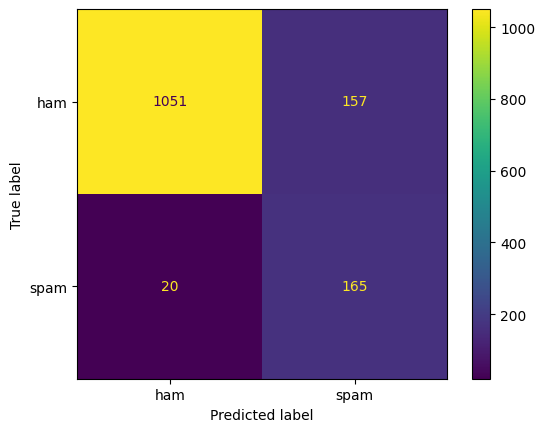

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         ham       0.98      1.00      0.99      1208\n        spam       0.99      0.86      0.92       185\n\n    accuracy                           0.98      1393\n   macro avg       0.98      0.93      0.95      1393\nweighted avg       0.98      0.98      0.98      1393\n'

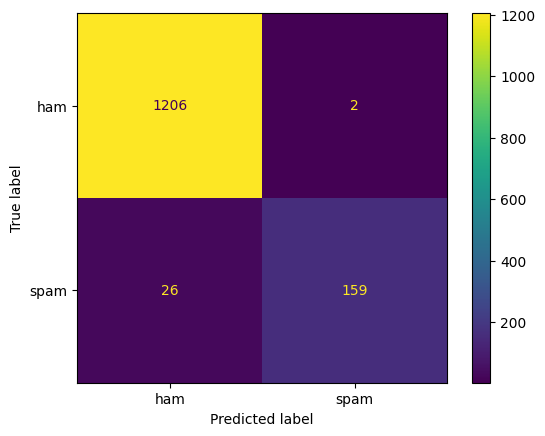

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train.toarray(), y_train)
y_pred = rf.predict(x_test.toarray())
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)